# imports and setup


In [1]:

import os
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from experiments.Adaptive_thershold.adaptive_threshold_function import *
from qualang_tools.analysis.discriminator import two_state_discriminator

 # %% Utils

def load_dataset(serial_number, base_folder=r'C:\Users\tomdv\Documents\QCC_QUAM\data\2024-09-16'):
    """
    Loads a dataset from a file based on the serial number.
    
    Args:
        serial_number: The serial number to search for.
        base_folder: The base directory to search in.
    
    Returns:
        An xarray Dataset if found, None otherwise.
    """
    # Find the subfolder with the matching serial number
    for subfolder in os.listdir(base_folder):
        if serial_number in subfolder:
            folder_path = os.path.join(base_folder, subfolder)
            
            # Look for .nc files in the subfolder
            nc_files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
            
            if nc_files:
                # Assuming there's only one .nc file per folder
                file_path = os.path.join(folder_path, nc_files[0])
                
                # Open the dataset
                ds = xr.open_dataset(file_path)
                return ds
            else:
                print(f"No .nc file found in folder: {folder_path}")
                return None
    
    # print(f"No folder found for serial number: {serial_number}")
    return None



# %%



In [2]:
from importlib import reload
import experiments.Adaptive_thershold.adaptive_threshold_function as atf
reload(atf)
from experiments.Adaptive_thershold.adaptive_threshold_function import *

# loading data

In [3]:
# Load datasets for each measurement
datasets = {}

# %%
# Define all measurements with their serial numbers, descriptions, and durations
all_measurements = [
    {"duration_ns": 600, "measurements": {
        "831": "IQ_blobs",
        "800": "Thermal initialization",
        "801": "RUS initialization",
        "802": "RUS capped initialization (waiting)",
        "824": "Adaptive threshold"
    }},
    {"duration_ns": 800, "measurements": {
        "832": "IQ_blobs",
        "806": "Thermal initialization",
        "807": "RUS initialization",
        "808": "RUS capped initialization (waiting)",
        "826": "Adaptive threshold"
    }},
    {"duration_ns": 1000, "measurements": {
        "833": "IQ_blobs",
        "821": "Thermal initialization",
        "812": "RUS initialization",
        "813": "RUS capped initialization (waiting)",
        "828": "Adaptive threshold"
    }},
    {"duration_ns": 1200, "measurements": {
        "834": "IQ_blobs",
        "816": "Thermal initialization",
        "817": "RUS initialization",
        "818": "RUS capped initialization (waiting)",
        "830": "Adaptive threshold"
    }}
]

# Initialize the datasets dictionary
datasets = {}

folders = [r'C:\Users\tomdv\Documents\QCC_QUAM\data\2024-09-16', r'C:\Users\tomdv\Documents\QCC_QUAM\data\2024-09-17']

# Load all datasets
for measurement_set in all_measurements:
    duration_ns = measurement_set["duration_ns"]
    for serial_number, description in measurement_set["measurements"].items():
        
        dataset = None
        for folder in folders:
            dataset = load_dataset(serial_number, folder)
            if dataset is not None:
                break
        
        if dataset is not None:
            # Mark the dataset with duration and description
            dataset.attrs['duration'] = f'{duration_ns} ns'
            dataset.attrs['description'] = description
            # Store the dataset using both duration and description as keys
            key = f"{duration_ns}ns_{description}"
            datasets[key] = dataset
        else:
            print(f"Failed to load dataset for {serial_number} ({description}, {duration_ns} ns) from all folders")

# Print a summary of loaded datasets
print(f"\nLoaded {len(datasets)} datasets:")
for key in datasets.keys():
    print(f"- {key}")
# %%


No folder found for serial number: 831
No folder found for serial number: 832
No folder found for serial number: 833
No folder found for serial number: 834

Loaded 20 datasets:
- 600ns_IQ_blobs
- 600ns_Thermal initialization
- 600ns_RUS initialization
- 600ns_RUS capped initialization (waiting)
- 600ns_Adaptive threshold
- 800ns_IQ_blobs
- 800ns_Thermal initialization
- 800ns_RUS initialization
- 800ns_RUS capped initialization (waiting)
- 800ns_Adaptive threshold
- 1000ns_IQ_blobs
- 1000ns_Thermal initialization
- 1000ns_RUS initialization
- 1000ns_RUS capped initialization (waiting)
- 1000ns_Adaptive threshold
- 1200ns_IQ_blobs
- 1200ns_Thermal initialization
- 1200ns_RUS initialization
- 1200ns_RUS capped initialization (waiting)
- 1200ns_Adaptive threshold


# IQ blobs

Number of thermal initialization datasets: 4
Dataset 1: 600ns_IQ_blobs
Dataset 2: 800ns_IQ_blobs
Dataset 3: 1000ns_IQ_blobs
Dataset 4: 1200ns_IQ_blobs

Analyzing dataset 1: 600ns_IQ_blobs
Intersection point: 0.0480 mV
Infidelity: 0.5107 ± 0.0080
Fidelity: 0.4893 ± 0.0080


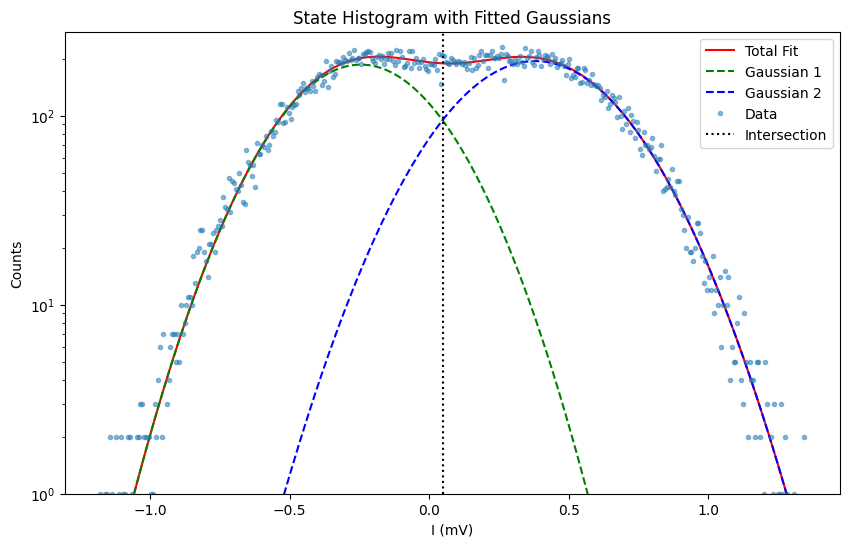

Dataset duration: 600 ns
Dataset date: Not specified
--------------------------------------------------

Analyzing dataset 2: 800ns_IQ_blobs
Intersection point: 0.1253 mV
Infidelity: 0.4906 ± 0.0042
Fidelity: 0.5094 ± 0.0042


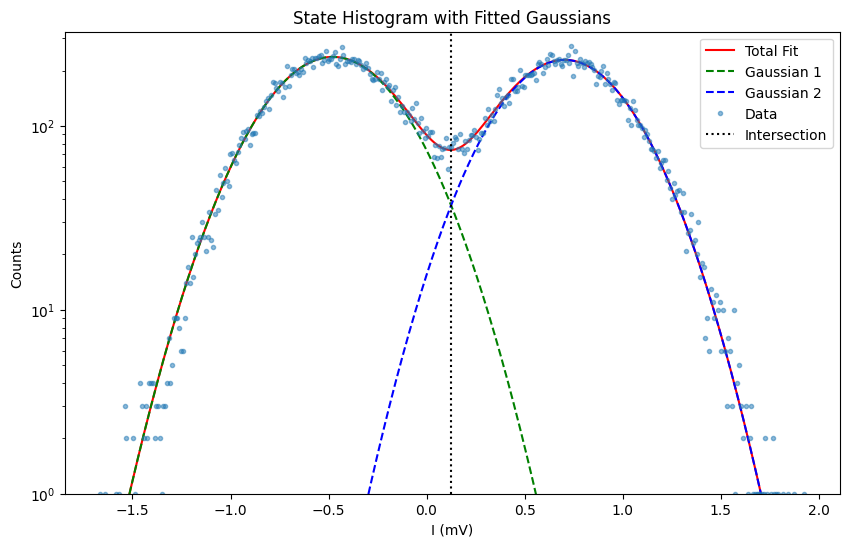

Dataset duration: 800 ns
Dataset date: Not specified
--------------------------------------------------

Analyzing dataset 3: 1000ns_IQ_blobs
Intersection point: 0.1563 mV
Infidelity: 0.4915 ± 0.0043
Fidelity: 0.5085 ± 0.0043


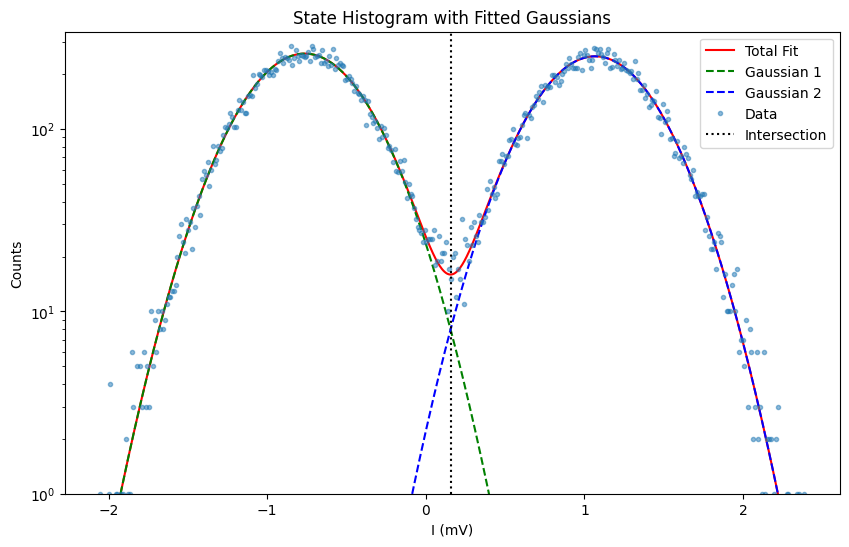

Dataset duration: 1000 ns
Dataset date: Not specified
--------------------------------------------------

Analyzing dataset 4: 1200ns_IQ_blobs
Intersection point: 0.1945 mV
Infidelity: 0.4780 ± 0.0036
Fidelity: 0.5220 ± 0.0036


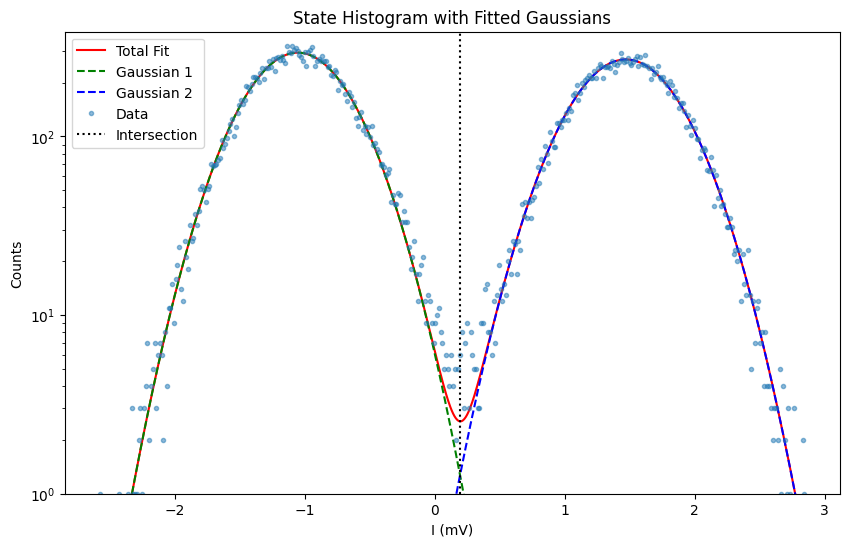

Dataset duration: 1200 ns
Dataset date: Not specified
--------------------------------------------------

Created new dataset with analysis results:
<xarray.Dataset> Size: 192B
Dimensions:         (duration: 4)
Coordinates:
  * duration        (duration) float64 32B 600.0 800.0 1e+03 1.2e+03
Data variables:
    fidelity        (duration) float64 32B 0.4893 0.5094 0.5085 0.522
    fidelity_error  (duration) float64 32B 0.007994 0.004156 0.004307 0.003635
    separation      (duration) float64 32B 0.0006257 0.001184 0.00183 0.002524
    avg_width       (duration) float64 32B 0.0002644 0.0003086 ... 0.0003839
    ratio           (duration) float64 32B 2.367 3.836 5.266 6.573


In [4]:



# Filter datasets for thermal initialization
IQ_blobs_datasets = [dataset for dataset in datasets if 'IQ_blobs' in dataset]

# Print the number of thermal initialization datasets found
print(f"Number of thermal initialization datasets: {len(IQ_blobs_datasets)}")

# Display information about each thermal initialization dataset
for i, dataset in enumerate(IQ_blobs_datasets, 1):
    print(f"Dataset {i}: {dataset}")

# Return the list of thermal initialization datasets
IQ_blobs_datasets

qname = 'q2'
# Initialize lists to store results
durations = []
fidelities = []
fidelity_errors = []
separations = []
avg_widths = []
popt_finals = []  # New list to store popt_final values

# Apply the analysis on all thermal initialization datasets
for i, dataset_name in enumerate(IQ_blobs_datasets, 1):
    print(f"\nAnalyzing dataset {i}: {dataset_name}")
    
    # Find the dataset object corresponding to the dataset name
    ds_name = next((dataset for dataset in datasets if dataset == dataset_name), None)
    
    if ds_name is None:
        print(f"Dataset {dataset_name} not found in the datasets list. Skipping.")
        continue
    
    ds = datasets[ds_name]
    angle, threshold, fidelity, gg, ge, eg, ee = two_state_discriminator(ds.I_g.sel(qubit = qname), ds.Q_g.sel(qubit = qname), ds.I_e.sel(qubit = qname), ds.Q_e.sel(qubit = qname), False, b_plot=False)
    Ig_rot = ds.I_g.sel(qubit = qname) * np.cos(angle) - ds.Q_g.sel(qubit = qname) * np.sin(angle)  
    Ie_rot = ds.I_e.sel(qubit = qname) * np.cos(angle) - ds.Q_e.sel(qubit = qname) * np.sin(angle)
    I_rot = np.concatenate((Ig_rot, Ie_rot))

    ds_I = xr.Dataset({'I' : (['qubit','N'], [I_rot])})
    popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error(ds_I.I)
    plot_threshold_analysis(ds_I, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset)
    plt.show()
    
    # Extract additional information
    duration = ds.attrs.get('duration', None)
    if duration is not None:
        # Convert duration to nanoseconds if it's a string
        if isinstance(duration, str):
            duration = float(duration.split()[0])  # Assumes format like "800 ns"
        
        # Calculate separation and average width
        separation = abs(popt_final[1] - popt_final[4])
        avg_width = (popt_final[2] + popt_final[5]) / 2
        
        # Append results to lists
        durations.append(duration)
        fidelities.append(1 - infidelity)
        fidelity_errors.append(infidelity_error)
        separations.append(separation)
        avg_widths.append(avg_width)
        popt_finals.append(popt_final)  # Append popt_final to the new list
    
    # Print additional information about the dataset
    print(f"Dataset duration: {ds.attrs.get('duration', 'Not specified')}")
    print(f"Dataset date: {ds.attrs.get('date', 'Not specified')}")
    print("-" * 50)

# Create a new dataset with the results
IQ_blobs_results_ds = xr.Dataset(
    {
        "fidelity": ("duration", fidelities),
        "fidelity_error": ("duration", fidelity_errors),
        "separation": ("duration", separations),
        "avg_width": ("duration", avg_widths),
        "ratio": ("duration", np.array(separations)/np.array(avg_widths)),
    },
    coords={"duration": durations}
)

# Save popt_finals in a separate dictionary
IQ_blobs_popt_finals_dict = {duration: popt for duration, popt in zip(durations, popt_finals)}

print("\nCreated new dataset with analysis results:")
print(IQ_blobs_results_ds)

# thermal initialization


Number of thermal initialization datasets: 4
Dataset 1: 600ns_Thermal initialization
Dataset 2: 800ns_Thermal initialization
Dataset 3: 1000ns_Thermal initialization
Dataset 4: 1200ns_Thermal initialization

Analyzing dataset 1: 600ns_Thermal initialization
Intersection point: 0.5397 mV
Infidelity: 0.0193 ± 0.0015
Fidelity: 0.9807 ± 0.0015


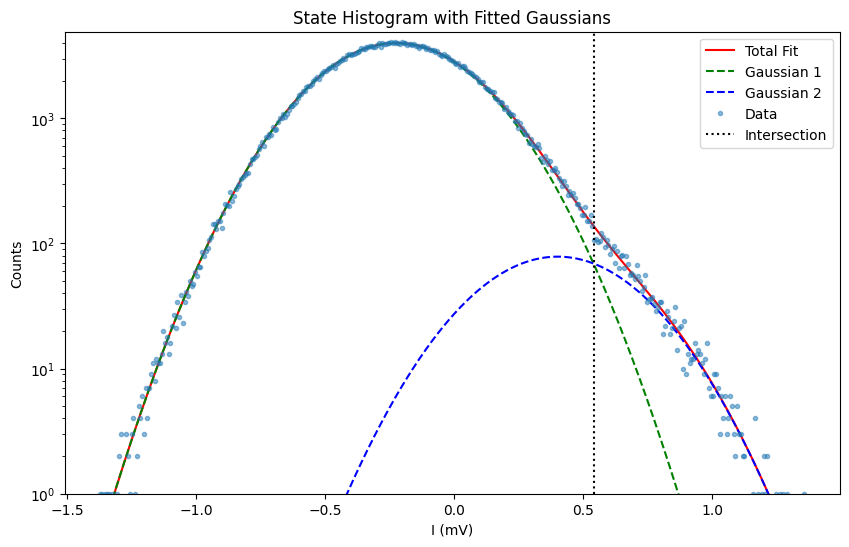

Dataset duration: 600 ns
Dataset date: Not specified
--------------------------------------------------

Analyzing dataset 2: 800ns_Thermal initialization
Intersection point: 0.4629 mV
Infidelity: 0.0195 ± 0.0011
Fidelity: 0.9805 ± 0.0011


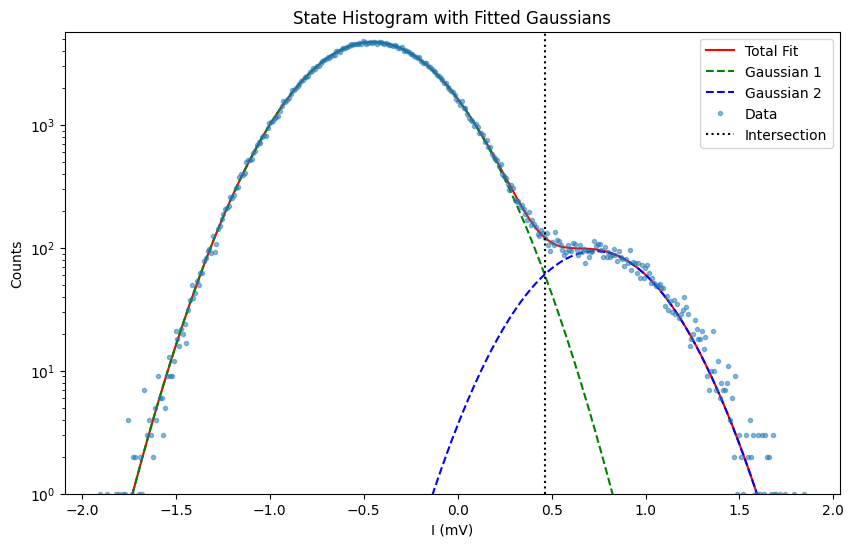

Dataset duration: 800 ns
Dataset date: Not specified
--------------------------------------------------

Analyzing dataset 3: 1000ns_Thermal initialization
Intersection point: 0.4241 mV
Infidelity: 0.0185 ± 0.0010
Fidelity: 0.9815 ± 0.0010


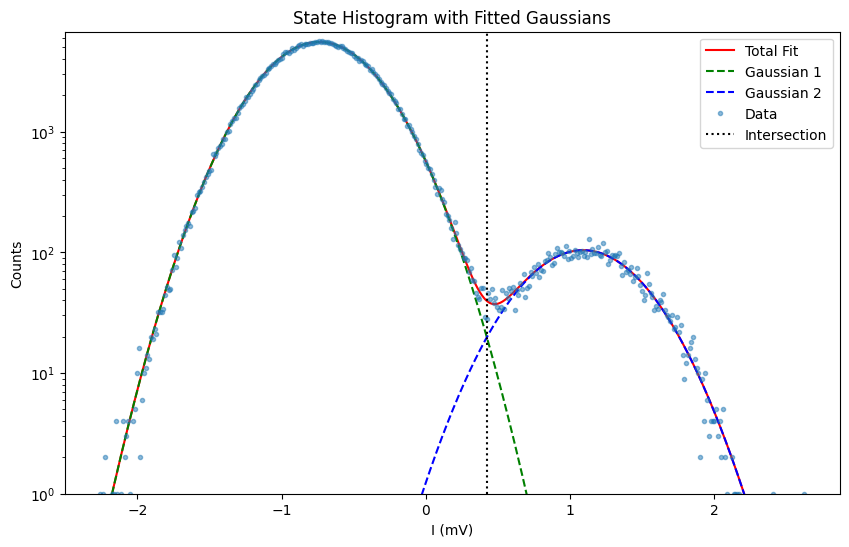

Dataset duration: 1000 ns
Dataset date: Not specified
--------------------------------------------------

Analyzing dataset 4: 1200ns_Thermal initialization
Intersection point: 0.4032 mV
Infidelity: 0.0197 ± 0.0010
Fidelity: 0.9803 ± 0.0010


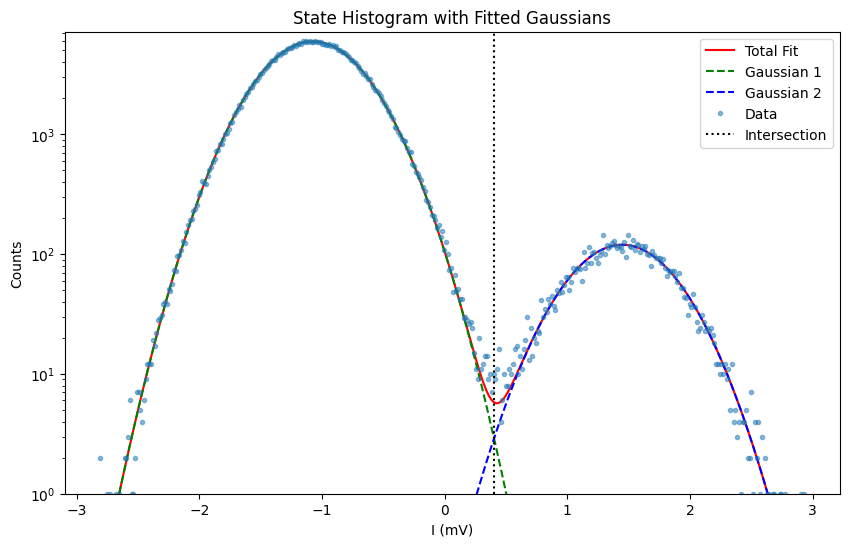

Dataset duration: 1200 ns
Dataset date: Not specified
--------------------------------------------------

Created new dataset with analysis results:
<xarray.Dataset> Size: 160B
Dimensions:         (duration: 4)
Coordinates:
  * duration        (duration) float64 32B 600.0 800.0 1e+03 1.2e+03
Data variables:
    fidelity        (duration) float64 32B 0.9807 0.9805 0.9815 0.9803
    fidelity_error  (duration) float64 32B 0.001484 0.001073 0.001018 0.001025
    separation      (duration) float64 32B 0.0006257 0.001184 0.00183 0.002524
    avg_width       (duration) float64 32B 0.0002725 0.0002983 ... 0.0003809


In [5]:
from importlib import reload
import experiments.Adaptive_thershold.adaptive_threshold_function as atf
reload(atf)
from experiments.Adaptive_thershold.adaptive_threshold_function import *

# Filter datasets for thermal initialization
thermal_init_datasets = [dataset for dataset in datasets if 'Thermal initialization' in dataset]

# Print the number of thermal initialization datasets found
print(f"Number of thermal initialization datasets: {len(thermal_init_datasets)}")

# Display information about each thermal initialization dataset
for i, dataset in enumerate(thermal_init_datasets, 1):
    print(f"Dataset {i}: {dataset}")

# Return the list of thermal initialization datasets
thermal_init_datasets

# Initialize lists to store results
durations = []
fidelities = []
fidelity_errors = []
separations = []
avg_widths = []
popt_finals = []  # New list to store popt_final values

# Apply the analysis on all thermal initialization datasets
for i, dataset_name in enumerate(thermal_init_datasets, 1):
    print(f"\nAnalyzing dataset {i}: {dataset_name}")
    
    # Find the dataset object corresponding to the dataset name
    ds_name = next((dataset for dataset in datasets if dataset == dataset_name), None)
    
    if ds_name is None:
        print(f"Dataset {dataset_name} not found in the datasets list. Skipping.")
        continue
    
    ds = datasets[ds_name]
    
    # Get the duration of the current dataset
    current_duration = ds.attrs.get('duration', None)
    if current_duration is None:
        print(f"Error: Dataset {dataset_name} does not have a 'duration' attribute. Skipping.")
        continue

    # Convert duration to float if it's a string
    if isinstance(current_duration, str):
        current_duration = float(current_duration.split()[0])  # Assumes format like "800 ns"
            
    # # Apply the find_threshold_with_error function to ds.I
    try:
        popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error(ds.I)

    except AttributeError:
        print(f"Error: Dataset {dataset_name} does not have an 'I' attribute. Skipping.")
        continue


    # # Find the corresponding thermal init results
    
    initial_guess = IQ_blobs_popt_finals_dict[current_duration]
    initial_guess[0] = initial_guess[0]*100
    initial_guess[3] = initial_guess[3]*100
    # print(current_duration)
    # print(initial_guess)
    # # Apply the find_threshold_with_error_and_guess function to ds.I
    try:
        popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_fixed(ds.I, initial_guess)
    except AttributeError:
        print(f"Error: Dataset {dataset_name} does not have an 'I' attribute. Skipping.")
        continue
    
    # Call the function with the results from find_threshold_with_error
    plot_threshold_analysis(ds, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset)
    plt.show()
    # Extract additional information
    duration = ds.attrs.get('duration', None)
    if duration is not None:
        # Convert duration to nanoseconds if it's a string
        if isinstance(duration, str):
            duration = float(duration.split()[0])  # Assumes format like "800 ns"
        
        # Calculate separation and average width
        separation = abs(popt_final[1] - popt_final[4])
        avg_width = (popt_final[2] + popt_final[5]) / 2
        
        # Append results to lists
        durations.append(duration)
        fidelities.append(1 - infidelity)
        fidelity_errors.append(infidelity_error)
        separations.append(separation)
        avg_widths.append(avg_width)
        popt_finals.append(popt_final)  # Append popt_final to the new list
    
    # Print additional information about the dataset
    print(f"Dataset duration: {ds.attrs.get('duration', 'Not specified')}")
    print(f"Dataset date: {ds.attrs.get('date', 'Not specified')}")
    print("-" * 50)

# Create a new dataset with the results
thermal_results_ds = xr.Dataset(
    {
        "fidelity": ("duration", fidelities),
        "fidelity_error": ("duration", fidelity_errors),
        "separation": ("duration", separations),
        "avg_width": ("duration", avg_widths),
    },
    coords={"duration": durations}
)

# Save popt_finals in a separate dictionary
thermal_popt_finals_dict = {duration: popt for duration, popt in zip(durations, popt_finals)}

print("\nCreated new dataset with analysis results:")
print(thermal_results_ds)

# Optional: Save the results dataset
# results_ds.to_netcdf("thermal_init_analysis_results.nc")


Intersection point: 0.4667 mV
Infidelity: 0.0195 ± 0.0011
Fidelity: 0.9805 ± 0.0011


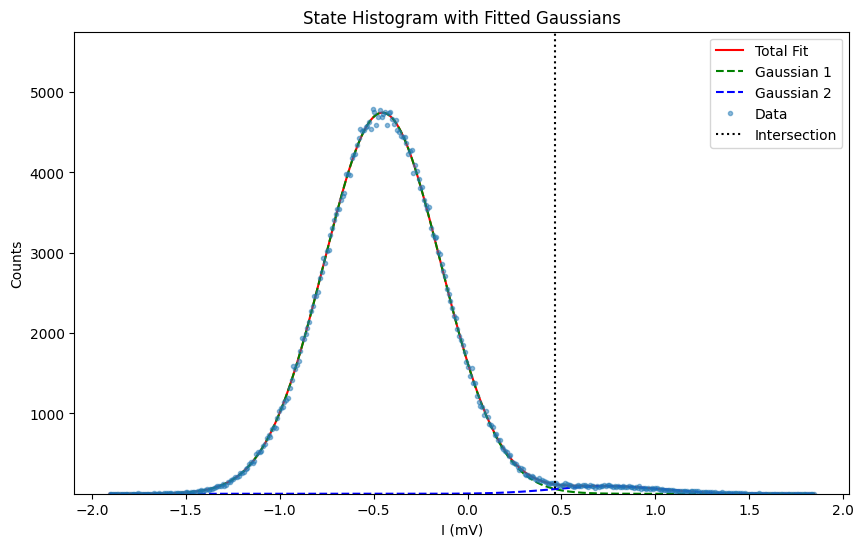

Intersection point: 0.4667 mV
Infidelity: 0.0195 ± 0.0011
Fidelity: 0.9805 ± 0.0011


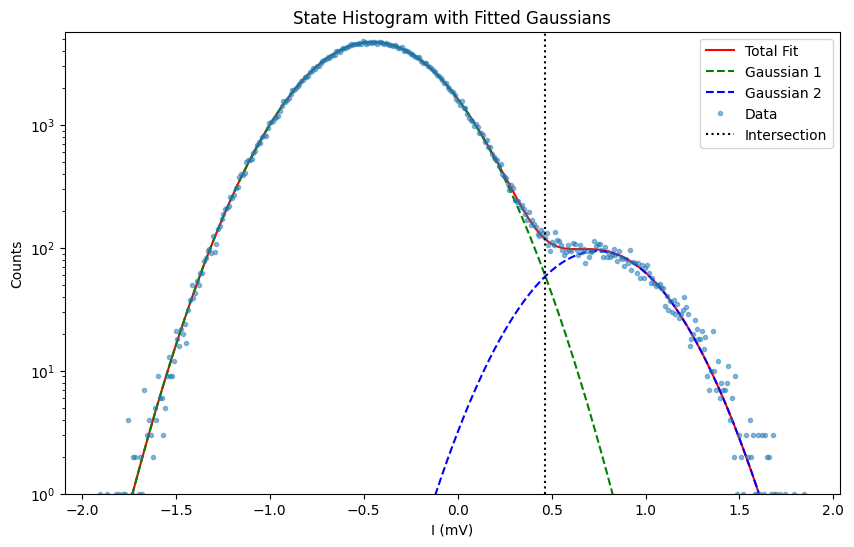

In [6]:
ds = datasets[thermal_init_datasets[1]]
popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error(ds.I)
plot_threshold_analysis(ds, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset, logplot = False)
plt.show()
plot_threshold_analysis(ds, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset, logplot = True)
plt.show()

# RUS initialization



Analyzing RUS datasets:
--------------------------------------------------
Intersection point: 0.5121 mV
Infidelity: 0.0244 ± 0.0020
Fidelity: 0.9756 ± 0.0020


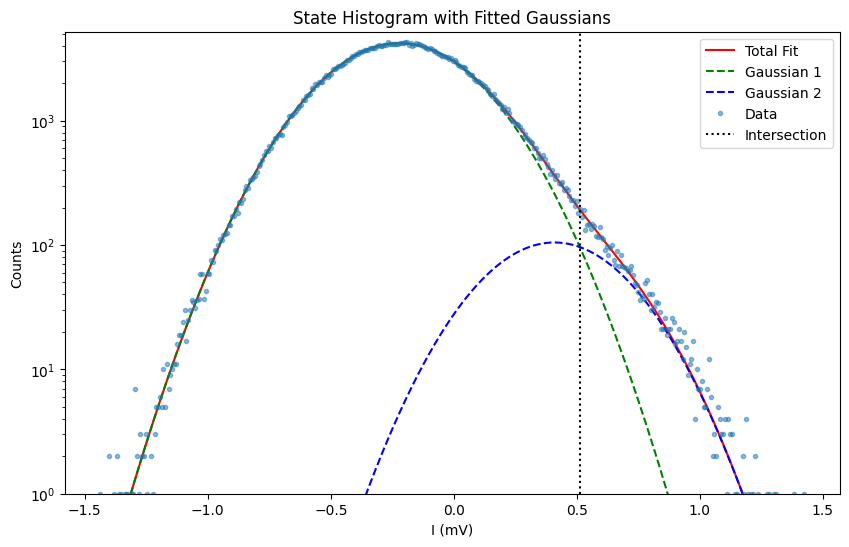

Dataset duration: 600 ns
Dataset date: Not specified
--------------------------------------------------
Intersection point: 0.5833 mV
Infidelity: 0.0036 ± 0.0010
Fidelity: 0.9964 ± 0.0010


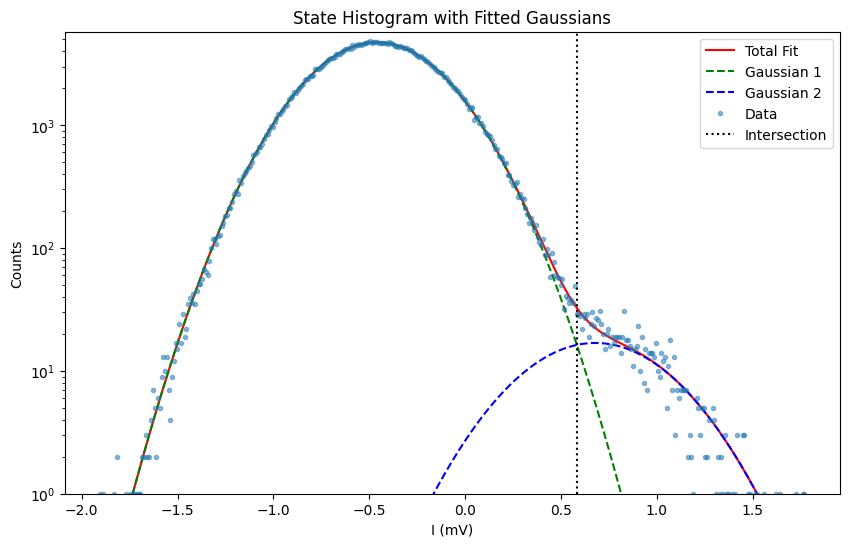

Dataset duration: 800 ns
Dataset date: Not specified
--------------------------------------------------
Intersection point: 0.5309 mV
Infidelity: 0.0031 ± 0.0009
Fidelity: 0.9969 ± 0.0009


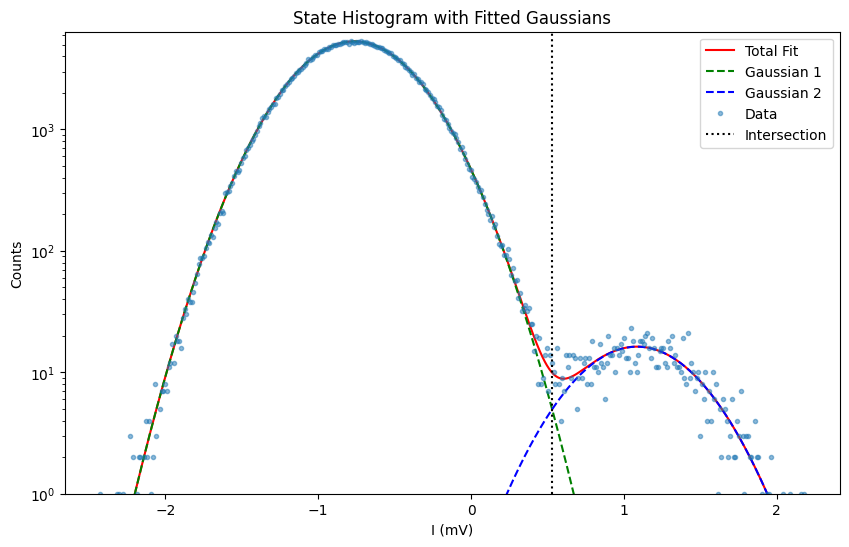

Dataset duration: 1000 ns
Dataset date: Not specified
--------------------------------------------------
Intersection point: 0.4724 mV
Infidelity: 0.0032 ± 0.0009
Fidelity: 0.9968 ± 0.0009


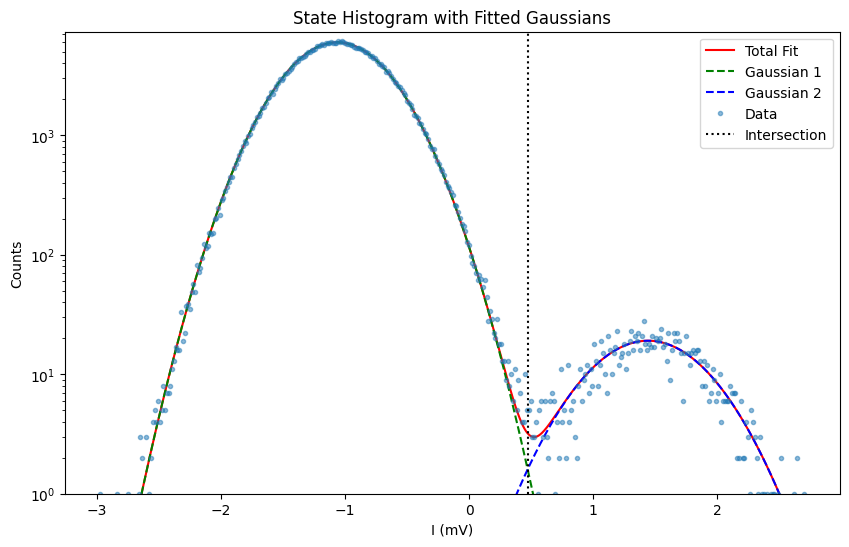

Dataset duration: 1200 ns
Dataset date: Not specified
--------------------------------------------------

Created new dataset with RUS analysis results:
<xarray.Dataset> Size: 160B
Dimensions:         (duration: 4)
Coordinates:
  * duration        (duration) float64 32B 600.0 800.0 1e+03 1.2e+03
Data variables:
    fidelity        (duration) float64 32B 0.9756 0.9964 0.9969 0.9968
    fidelity_error  (duration) float64 32B 0.001998 0.0009803 ... 0.0009104
    separation      (duration) float64 32B 0.0006308 0.00114 0.001851 0.002506
    avg_width       (duration) float64 32B 0.000259 0.0003323 ... 0.0004073


In [7]:

# Perform the same analysis for RUS datasets
rus_durations = []
rus_fidelities = []
rus_fidelity_errors = []
rus_separations = []
rus_avg_widths = []

print("\nAnalyzing RUS datasets:")
print("-" * 50)

for dataset_name, ds in datasets.items():
    if 'RUS initialization' not in dataset_name:
        continue
    
    if 'I' not in ds:
        print(f"Error: Dataset {dataset_name} does not have an 'I' attribute. Skipping.")
        continue

    # Get the duration of the current dataset
    current_duration = ds.attrs.get('duration', None)
    if current_duration is None:
        print(f"Error: Dataset {dataset_name} does not have a 'duration' attribute. Skipping.")
        continue

    # Convert duration to float if it's a string
    if isinstance(current_duration, str):
        current_duration = float(current_duration.split()[0])  # Assumes format like "800 ns"

    # Find the corresponding thermal init results
    initial_guess = thermal_popt_finals_dict[current_duration]

    # Apply the find_threshold_with_error_and_guess function to ds.I
    try:
        # popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_fixed(ds.I, initial_guess)
        popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error(ds.I)

    except AttributeError:
        print(f"Error: Dataset {dataset_name} does not have an 'I' attribute. Skipping.")
    
    # Call the function with the results from find_threshold_with_error
    plot_threshold_analysis(ds, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset)
    plt.show()
    
    
    # Extract additional information
    duration = ds.attrs.get('duration', None)
    if duration is not None:
        # Convert duration to nanoseconds if it's a string
        if isinstance(duration, str):
            duration = float(duration.split()[0])  # Assumes format like "800 ns"
        
        # Calculate separation and average width
        separation = abs(popt_final[1] - popt_final[4])
        avg_width = (popt_final[2] + popt_final[5]) / 2
        
        # Append results to lists
        rus_durations.append(duration)
        rus_fidelities.append(1 - infidelity)
        rus_fidelity_errors.append(infidelity_error)
        rus_separations.append(separation)
        rus_avg_widths.append(avg_width)
    
    # Print additional information about the dataset
    print(f"Dataset duration: {ds.attrs.get('duration', 'Not specified')}")
    print(f"Dataset date: {ds.attrs.get('date', 'Not specified')}")
    print("-" * 50)

# Create a new dataset with the RUS results
rus_results_ds = xr.Dataset(
    {
        "fidelity": ("duration", rus_fidelities),
        "fidelity_error": ("duration", rus_fidelity_errors),
        "separation": ("duration", rus_separations),
        "avg_width": ("duration", rus_avg_widths)
    },
    coords={"duration": rus_durations}
)

print("\nCreated new dataset with RUS analysis results:")
print(rus_results_ds)

600ns_RUS initialization
[-0.65651382 -0.13567987]
1.1453151801677222
1.0775176569608251
800ns_RUS initialization
[-0.63830381 -0.04689573]
1.048012730396352
1.1194863537146862
1000ns_RUS initialization
[-0.56665787 -0.16120674]
1.1749278480396697
1.3117039816272253
1200ns_RUS initialization
[-0.41807692 -0.58816189]
1.800675536243575
1.9266430337649667


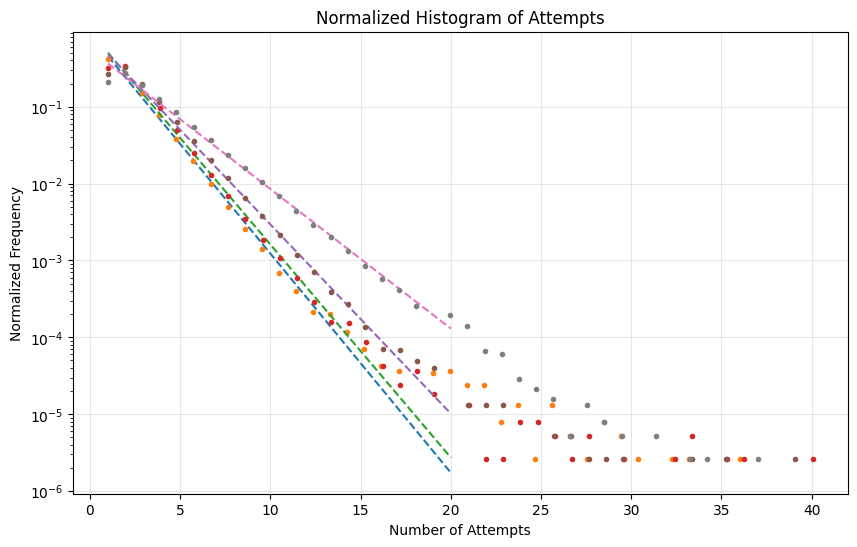

In [8]:
f,ax =plt.subplots(figsize=(10,6))
for dataset_name, ds in datasets.items():
    if 'RUS initialization' not in dataset_name:
        continue
    print(dataset_name)
    # Calculate the histogram
    hist, bins = np.histogram(ds.attempts, bins=int(ds.attempts.max().values) + 1, density=True)
    # Filter data between 1 and 15 attempts
    mask = (bins[:-1] >= 1) & (bins[:-1] <= 15)
    filtered_bins = bins[:-1][mask]
    filtered_hist = hist[mask]
    
    log_hist = np.log(filtered_hist[filtered_hist > 0])  # Avoid log(0)
    valid_bins = filtered_bins[filtered_hist > 0]
    coeffs = np.polyfit(valid_bins, log_hist, 1)
    print(coeffs)
    print(1/np.exp(coeffs[1]))
    print(np.exp(coeffs[0])/(1-np.exp(coeffs[0])))
    # Generate points for the fitted line
    x_fit = np.linspace(1, 20, 100)
    y_fit = np.exp(coeffs[1] + coeffs[0] * x_fit)
    
    # Plot the fitted line
    ax.semilogy(x_fit, y_fit, '--', label=f'{dataset_name} (fit)')
    # Plot the normalized histogram
    
    ax.semilogy(bins[:-1], hist,'.')
    ax.set_xlabel('Number of Attempts')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title('Normalized Histogram of Attempts')
    ax.grid(alpha=0.3)
plt.show()
    

In [9]:
print(1/np.exp(coeffs[1]))
print(np.exp(coeffs[0])/(1-np.exp(coeffs[0])))

1.800675536243575
1.9266430337649667


# Capped RUS

In [10]:
# Initialize dictionaries to store results for RUS capped (waiting)
rus_capped_fidelities = {}
rus_capped_fidelity_errors = {}
rus_capped_separations = {}
rus_capped_avg_widths = {}

# Filter datasets for RUS capped initialization (waiting)
rus_capped_datasets = {k: v for k, v in datasets.items() if "RUS capped initialization (waiting)" in k}

print("\nAnalyzing RUS capped initialization (waiting) datasets:")
for dataset_name, ds in rus_capped_datasets.items():
    print(f"\nAnalyzing dataset: {dataset_name}")
    
    # Extract duration
    duration = ds.attrs.get('duration', None)
    if duration is not None and isinstance(duration, str):
        duration = float(duration.split()[0])  # Assumes format like "800 ns"
    popt0 = find_threshold_with_error( ds.sel(max_attempts=0).I)[0]
    # Loop over the 'n' coordinate
    for max_attempts in ds.max_attempts.values:
        print(f"  Analyzing for max_attempts = {max_attempts}")
        
        try:
            # Select data for the current 'n' value
            ds_n = ds.sel(max_attempts=max_attempts)
            # popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error(ds_n.I)
            popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_fixed(ds_n.I, popt0)

        except AttributeError:
            print(f"Error: Dataset {dataset_name} does not have an 'I' attribute for max_attempts = {max_attempts}. Skipping.")
            continue
        
        # Call the function with the results from find_threshold_with_error
        # plot_threshold_analysis(ds_n, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset)
        
        # Calculate separation and average width
        separation = abs(popt_final[1] - popt_final[4])
        avg_width = (popt_final[2] + popt_final[5]) / 2
        
        # Store results in dictionaries
        if duration not in rus_capped_fidelities:
            rus_capped_fidelities[duration] = {}
            rus_capped_fidelity_errors[duration] = {}
            rus_capped_separations[duration] = {}
            rus_capped_avg_widths[duration] = {}
        
        rus_capped_fidelities[duration][max_attempts] = 1 - infidelity
        rus_capped_fidelity_errors[duration][max_attempts] = infidelity_error
        rus_capped_separations[duration][max_attempts] = separation
        rus_capped_avg_widths[duration][max_attempts] = avg_width
        
        # Print additional information about the dataset
        print(f"    Dataset duration: {duration}")
        print(f"    Dataset max_attempts value: {max_attempts}")
        print(f"    Dataset date: {ds.attrs.get('date', 'Not specified')}")
        print("    " + "-" * 46)

# Create a new xarray Dataset with the RUS capped (waiting) results
durations = sorted(rus_capped_fidelities.keys())
max_attempts_values = sorted(set(max_attempts for d in rus_capped_fidelities.values() for max_attempts in d.keys()))

rus_capped_results_ds = xr.Dataset(
    {
        "fidelity": (["duration", "max_attempts"], [[rus_capped_fidelities.get(d, {}).get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for d in durations]),
        "fidelity_error": (["duration", "max_attempts"], [[rus_capped_fidelity_errors.get(d, {}).get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for d in durations]),
        "separation": (["duration", "max_attempts"], [[rus_capped_separations.get(d, {}).get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for d in durations]),
        "avg_width": (["duration", "max_attempts"], [[rus_capped_avg_widths.get(d, {}).get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for d in durations])
    },
    coords={
        "duration": durations,
        "max_attempts": max_attempts_values
    }
)

print("\nCreated new dataset with RUS capped (waiting) analysis results:")
print(rus_capped_results_ds)

# Optional: Save the RUS capped (waiting) results dataset
# rus_capped_results_ds.to_netcdf("rus_capped_waiting_analysis_results.nc")



Analyzing RUS capped initialization (waiting) datasets:

Analyzing dataset: 600ns_RUS capped initialization (waiting)
  Analyzing for max_attempts = 0
    Dataset duration: 600.0
    Dataset max_attempts value: 0
    Dataset date: Not specified
    ----------------------------------------------
  Analyzing for max_attempts = 1
    Dataset duration: 600.0
    Dataset max_attempts value: 1
    Dataset date: Not specified
    ----------------------------------------------
  Analyzing for max_attempts = 2
    Dataset duration: 600.0
    Dataset max_attempts value: 2
    Dataset date: Not specified
    ----------------------------------------------
  Analyzing for max_attempts = 3
    Dataset duration: 600.0
    Dataset max_attempts value: 3
    Dataset date: Not specified
    ----------------------------------------------
  Analyzing for max_attempts = 4
    Dataset duration: 600.0
    Dataset max_attempts value: 4
    Dataset date: Not specified
    --------------------------------------

<xarray.Dataset> Size: 1kB
Dimensions:         (duration: 4, max_attempts: 10)
Coordinates:
  * duration        (duration) float64 32B 600.0 800.0 1e+03 1.2e+03
  * max_attempts    (max_attempts) int32 40B 0 1 2 3 4 5 6 7 8 9
Data variables:
    fidelity        (duration, max_attempts) float64 320B 0.6301 ... 0.9856
    fidelity_error  (duration, max_attempts) float64 320B 0.001978 ... 0.0009024
    separation      (duration, max_attempts) float64 320B 0.0006248 ... 0.00254
    avg_width       (duration, max_attempts) float64 320B 0.0002684 ... 0.000387


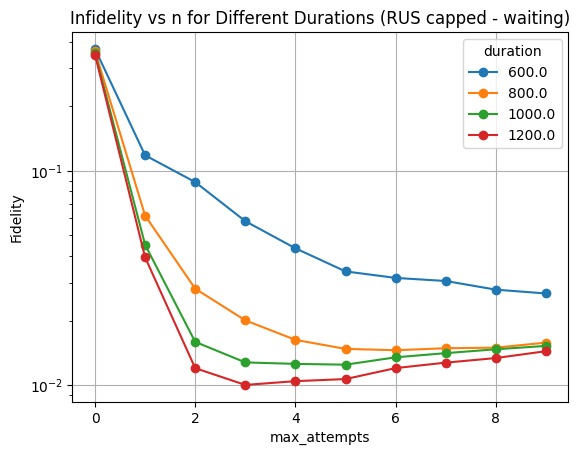

In [11]:

# %%
print(rus_capped_results_ds)
# %%
(1 - rus_capped_results_ds.fidelity).plot(hue='duration', marker='o', linestyle='-', yscale='log')
plt.xlabel('max_attempts')
plt.ylabel('Fidelity')
plt.title('Infidelity vs n for Different Durations (RUS capped - waiting)')
# plt.legend(title='Duration (ns)')
plt.grid(True)
plt.show()
# %%

# Adaptive threshold


In [12]:
# Initialize dictionaries to store results for Adaptive Threshold
adaptive_threshold_fidelities = {}
adaptive_threshold_fidelity_errors = {}
adaptive_threshold_separations = {}
adaptive_threshold_avg_widths = {}
adaptive_threshold_thresholds = {}

# Filter datasets for Adaptive Threshold
adaptive_threshold_datasets = {k: v for k, v in datasets.items() if "Adaptive threshold" in k}

print("\nAnalyzing Adaptive Threshold datasets:")
for dataset_name, ds in adaptive_threshold_datasets.items():
    print(f"\nAnalyzing dataset: {dataset_name}")
    
    # Extract duration
    duration = ds.attrs.get('duration', None)
    if duration is not None and isinstance(duration, str):
        duration = float(duration.split()[0])  # Assumes format like "800 ns"
    
    # Get the corresponding thermal init results for this duration
    initial_guess = thermal_popt_finals_dict[duration]
    
    # Initialize nested dictionaries for this duration
    if duration not in adaptive_threshold_fidelities:
        adaptive_threshold_fidelities[duration] = {}
        adaptive_threshold_fidelity_errors[duration] = {}
        adaptive_threshold_separations[duration] = {}
        adaptive_threshold_avg_widths[duration] = {}
        adaptive_threshold_thresholds[duration] = {}
    
    # Loop over the 'iteration' coordinate
    for iteration in ds.iteration.values:
        print(f"  Analyzing iteration = {iteration}")
        
        # Initialize dictionaries for this iteration
        adaptive_threshold_fidelities[duration][iteration] = {}
        adaptive_threshold_fidelity_errors[duration][iteration] = {}
        adaptive_threshold_separations[duration][iteration] = {}
        adaptive_threshold_avg_widths[duration][iteration] = {}
        adaptive_threshold_thresholds[duration][iteration] = {}
        
        popt0 = find_threshold_with_error( ds.sel(iteration=iteration, max_attempts=0).I)[0]
        
        # Loop over the 'max_attempts' coordinate
        for max_attempts in ds.max_attempts.values:
            print(f"    Analyzing for max_attempts = {max_attempts}")
            
            try:
                # Select data for the current 'iteration' and 'max_attempts' value
                ds_iter_max_attempts = ds.sel(iteration=iteration, max_attempts=max_attempts)
                
                # Try default method first
                # try:
                #     popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error(ds_iter_max_attempts.I)
                # except:
                #     print(f"      Failed to fit using default method. Trying find_threshold_with_error_and_guess_free.")
                #     popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_free(ds_iter_max_attempts.I, initial_guess)
                popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_fixed(ds_iter_max_attempts.I, popt0)

            except AttributeError:
                print(f"Error: Dataset {dataset_name} does not have an 'I' attribute for iteration = {iteration}, max_attempts = {max_attempts}. Skipping.")
                continue

            # Call the function with the results from the analysis
            # plot_threshold_analysis(ds_iter_max_attempts, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset)
            
            # Calculate separation and average width
            separation = abs(popt_final[1] - popt_final[4])
            avg_width = (popt_final[2] + popt_final[5]) / 2
            
            # Store results
            adaptive_threshold_fidelities[duration][iteration][max_attempts] = 1 - infidelity
            adaptive_threshold_fidelity_errors[duration][iteration][max_attempts] = infidelity_error
            adaptive_threshold_separations[duration][iteration][max_attempts] = separation
            adaptive_threshold_avg_widths[duration][iteration][max_attempts] = avg_width
            adaptive_threshold_thresholds[duration][iteration][max_attempts] = intersection
            
            # Print additional information about the dataset
            print(f"      Dataset duration: {duration}")
            print(f"      Dataset iteration: {iteration}")
            print(f"      Dataset max_attempts value: {max_attempts}")
            print(f"      Dataset date: {ds.attrs.get('date', 'Not specified')}")
            print("      " + "-" * 42)

# Create a new xarray Dataset with the Adaptive Threshold results
durations = sorted(adaptive_threshold_fidelities.keys())
iterations = sorted(set(iter for d in adaptive_threshold_fidelities.values() for iter in d.keys()))
max_attempts_values = sorted(set(max_attempts for d in adaptive_threshold_fidelities.values() for iter in d.values() for max_attempts in iter.keys()))

adaptive_threshold_results_ds = xr.Dataset(
    {
        "fidelity": (["duration", "iteration", "max_attempts"], [[[adaptive_threshold_fidelities[d][iter].get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for iter in iterations] for d in durations]),
        "fidelity_error": (["duration", "iteration", "max_attempts"], [[[adaptive_threshold_fidelity_errors[d][iter].get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for iter in iterations] for d in durations]),
        "separation": (["duration", "iteration", "max_attempts"], [[[adaptive_threshold_separations[d][iter].get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for iter in iterations] for d in durations]),
        "avg_width": (["duration", "iteration", "max_attempts"], [[[adaptive_threshold_avg_widths[d][iter].get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for iter in iterations] for d in durations]),
        "threshold": (["duration", "iteration", "max_attempts"], [[[adaptive_threshold_thresholds[d][iter].get(max_attempts, float('nan')) for max_attempts in max_attempts_values] for iter in iterations] for d in durations])
    },
    coords={
        "duration": durations,
        "iteration": iterations,
        "max_attempts": max_attempts_values
    }
)

print("\nCreated new dataset with Adaptive Threshold analysis results:")
print(adaptive_threshold_results_ds)

# Optional: Save the Adaptive Threshold results dataset
# adaptive_threshold_results_ds.to_netcdf("adaptive_threshold_analysis_results.nc")



Analyzing Adaptive Threshold datasets:

Analyzing dataset: 600ns_Adaptive threshold
  Analyzing iteration = 0
    Analyzing for max_attempts = 0
      Dataset duration: 600.0
      Dataset iteration: 0
      Dataset max_attempts value: 0
      Dataset date: Not specified
      ------------------------------------------
    Analyzing for max_attempts = 1
      Dataset duration: 600.0
      Dataset iteration: 0
      Dataset max_attempts value: 1
      Dataset date: Not specified
      ------------------------------------------
    Analyzing for max_attempts = 2
      Dataset duration: 600.0
      Dataset iteration: 0
      Dataset max_attempts value: 2
      Dataset date: Not specified
      ------------------------------------------
    Analyzing for max_attempts = 3
      Dataset duration: 600.0
      Dataset iteration: 0
      Dataset max_attempts value: 3
      Dataset date: Not specified
      ------------------------------------------
    Analyzing for max_attempts = 4
      Data

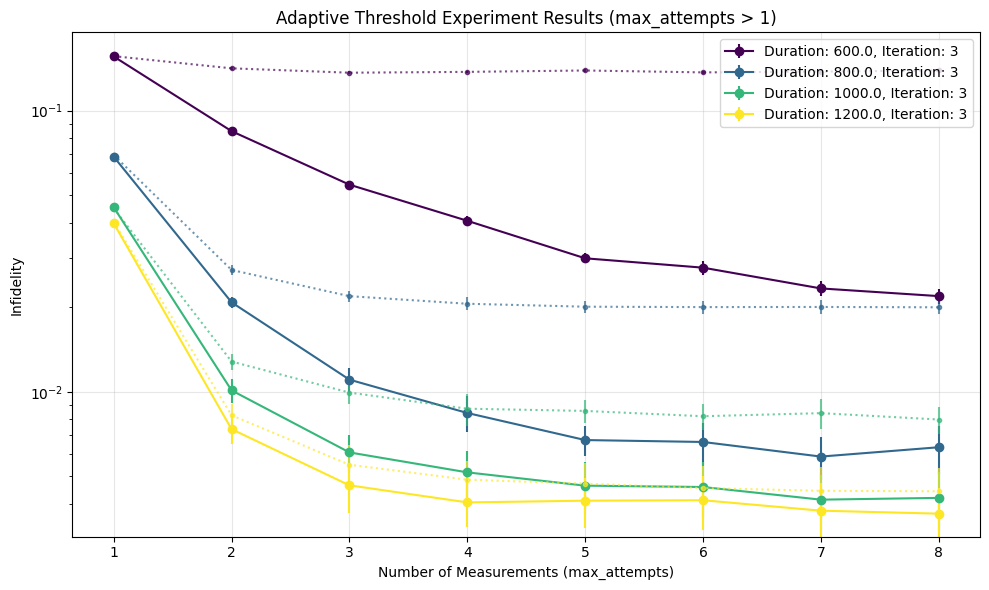

In [13]:
# Plot results from adaptive threshold experiment, ignoring max_attempts=1

f,ax = plt.subplots(figsize = (10,6))
durations = adaptive_threshold_results_ds.duration.values
colors = plt.cm.viridis(np.linspace(0, 1, len(durations)))

for idx, duration in enumerate(durations):
    for iteration in [0,3]:  # Assuming 4 iterations (0-3)
        data = adaptive_threshold_results_ds.sel(duration=duration, iteration=iteration)
        
        # Filter out max_attempts=1
        data = data.where(data.max_attempts > 0, drop=True)
        
        # Calculate infidelity and its error
        infidelity = 1 - data.fidelity
        infidelity_error = data.fidelity_error
        
        ax.errorbar(data.max_attempts, infidelity, 
                     yerr=infidelity_error,  # Using 2-sigma error bars
                     marker='o' if iteration == 3 else '.', 
                     linestyle='-' if iteration == 3 else ':',
                     color=colors[idx],
                     label=f'Duration: {duration}, Iteration: {iteration}' if iteration == 3 else None,
                     alpha=0.7 if iteration < 3 else 1)
        ax.set_yscale('log')

plt.xlabel('Number of Measurements (max_attempts)')
plt.ylabel('Infidelity')
plt.title('Adaptive Threshold Experiment Results (max_attempts > 1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



# Summary

In [14]:
# %%
import xarray as xr
import numpy as np

# Calculate the best fidelity, error, and corresponding separation/width ratio for each method and duration
methods = ['thermal', 'rus','rus_capped_waiting', 'adaptive_threshold', 'basic_reset_once', 'basic_reset_repeated']
best_fidelities = {}
best_errors = {}
separation_width_ratios = {}
# durations = ds.duration.values

for method in methods:
    best_fidelities[method] = []
    best_errors[method] = []
    separation_width_ratios[method] = []
    
    if method == 'adaptive_threshold' or method == 'basic_reset_once' or method == 'basic_reset_repeated':
        ds = adaptive_threshold_results_ds
    elif method == 'rus_capped_waiting':
        ds = rus_capped_results_ds
    else:
        ds = eval(f"{method}_results_ds")
    
    for duration in durations:
        # if duration not in durations:
        #     durations.append(duration)
        # print(duration)
        
        if method in ['thermal', 'rus']:
            # For thermal and rus, there's only one value per duration
            best_fidelity = ds.sel(duration=duration).fidelity.values.item()
            best_error = ds.sel(duration=duration).fidelity_error.values.item()
            separation = ds.sel(duration=duration).separation.values.item()
            avg_width = ds.sel(duration=duration).avg_width.values.item()
            ratio = separation / avg_width
        else:
            fidelities = ds.sel(duration=duration).fidelity.values
            best_fidelity = np.nanmax(fidelities)
            best_index = np.nanargmax(fidelities)
            
            if method == 'adaptive_threshold':
                # For adaptive_threshold, we need both max_attempts and iteration
                best_max_attempts = ds.max_attempts.values[best_index // len(ds.iteration)]
                best_iteration = ds.iteration.values[best_index % len(ds.iteration)]
                separation = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).separation.values.item()
                avg_width = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).avg_width.values.item()
                best_error = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).fidelity_error.values.item()
            elif method == 'basic_reset_once':
                # For adaptive_threshold, we need both max_attempts and iteration
                best_max_attempts = 1
                best_iteration = 0
                best_fidelity = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).fidelity.values.item()
                separation = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).separation.values.item()
                avg_width = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).avg_width.values.item()
                best_error = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).fidelity_error.values.item()                
            elif method == 'basic_reset_repeated':
                # For adaptive_threshold, we need both max_attempts and iteration
                best_max_attempts = 8
                best_iteration = 0
                best_fidelity = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).fidelity.values.item()
                separation = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).separation.values.item()
                avg_width = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).avg_width.values.item()
                best_error = ds.sel(duration=duration, max_attempts=best_max_attempts, iteration=best_iteration).fidelity_error.values.item()                
            else:
                # For rus_capped_waiting and rus_capped_not_waiting
                best_max_attempts = ds.max_attempts.values[best_index]
                separation = ds.sel(duration=duration, max_attempts=best_max_attempts).separation.values.item()
                avg_width = ds.sel(duration=duration, max_attempts=best_max_attempts).avg_width.values.item()
                best_error = ds.sel(duration=duration, max_attempts=best_max_attempts).fidelity_error.values.item()


            ratio = separation / avg_width        
        best_fidelities[method].append(best_fidelity)
        best_errors[method].append(best_error)
        separation_width_ratios[method].append(ratio)

# Create an xarray DataArray with the fidelity and error summary results
summary = xr.Dataset(
    data_vars={
        "best_fidelity": (["experiment", "duration"], [best_fidelities[method] for method in methods]),
        "best_error": (["experiment", "duration"], [best_errors[method] for method in methods]),
        "separation_width_ratio": (["experiment", "duration"], [separation_width_ratios[method] for method in methods])
    },
    coords={
        "experiment": methods,
        "duration": durations
    }
)




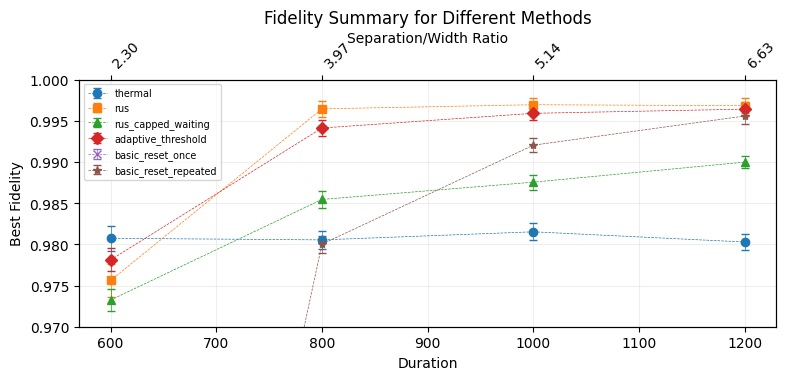

In [15]:

# Plot fidelity summary
f,ax = plt.subplots(figsize= (8,4))
markers = ['o', 's', '^', 'D','x','*']  # Different markers for each method
for i, method in enumerate(methods):
    ax.errorbar(durations, summary.best_fidelity.sel(experiment=method), 
                 yerr=summary.best_error.sel(experiment=method),
                 marker=markers[i], label=method, capsize=3, linestyle='--', lw=0.5)


ax.set_xlabel('Duration')
ax.set_ylabel('Best Fidelity')
ax.set_title('Fidelity Summary for Different Methods')
ax.legend(fontsize='x-small')  # Reduced legend font size
ax.grid(True, alpha = 0.2)
ax.set_ylim(0.97,1.0)
# Create a secondary x-axis for the separation/width ratio
ax2 = ax.twiny()

# Calculate the ratio values for each method and duration
ratio_values = summary.separation_width_ratio.values

# Set the secondary x-axis ticks and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(durations)
ax2.set_xticklabels([f'{ratio:.2f}' for ratio in ratio_values[0]], rotation=45, ha='left')

# Set the label for the secondary x-axis
ax2.set_xlabel('Separation/Width Ratio')

# Adjust the position of the secondary x-axis label to avoid overlap
ax2.xaxis.set_label_coords(0.5, 1.15)


# Adjust x-axis ticks if needed
if len(durations) > 10:
    ax.set_xticks(rotation=45, fontsize='x-small')  # Reduced tick font size

plt.tight_layout()
plt.show()


# %%

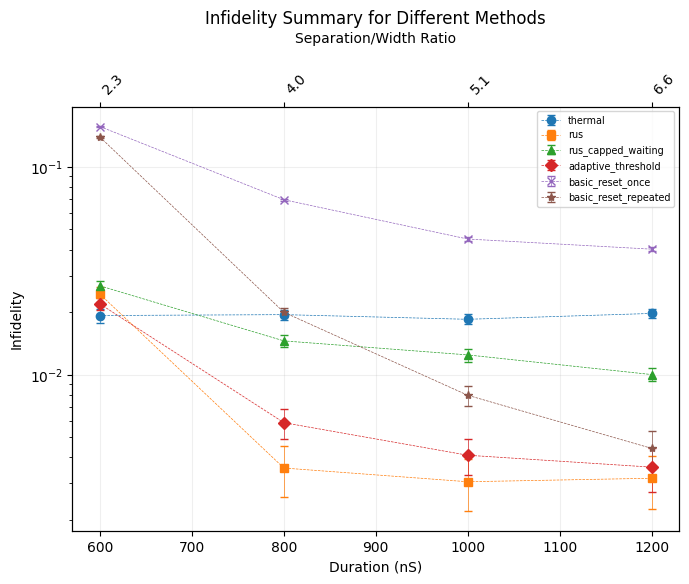

In [16]:

# Plot infidelity summary
f, ax = plt.subplots(figsize=(7, 6))
markers = ['o', 's', '^', 'D', 'x','*']  # Different markers for each method
for i, method in enumerate(methods):
    infidelity = 1 - summary.best_fidelity.sel(experiment=method)
    infidelity_error = summary.best_error.sel(experiment=method)
    ax.errorbar(durations, infidelity, 
                yerr=infidelity_error,
                marker=markers[i], label=method, capsize=3, linestyle='--', lw=0.5)

ax.set_xlabel('Duration (nS)')
ax.set_ylabel('Infidelity')
ax.set_title('Infidelity Summary for Different Methods')
ax.legend(fontsize='x-small')  # Reduced legend font size
ax.grid(True, alpha=0.2)
ax.set_yscale('log')  # Set y-axis to logarithmic scale

# Create a secondary x-axis for the separation/width ratio
ax2 = ax.twiny()

# Calculate the ratio values for each method and duration
ratio_values = summary.separation_width_ratio.values

# Set the secondary x-axis ticks and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(durations)
ax2.set_xticklabels([f'{ratio:.1f}' for ratio in ratio_values[0]], rotation=45, ha='left')

# Set the label for the secondary x-axis
ax2.set_xlabel('Separation/Width Ratio')

# Adjust the position of the secondary x-axis label to avoid overlap
ax2.xaxis.set_label_coords(0.5, 1.15)

# Adjust x-axis ticks if needed
if len(durations) > 10:
    ax.set_xticks(rotation=45, fontsize='x-small')  # Reduced tick font size

plt.tight_layout()
plt.show()


# %%

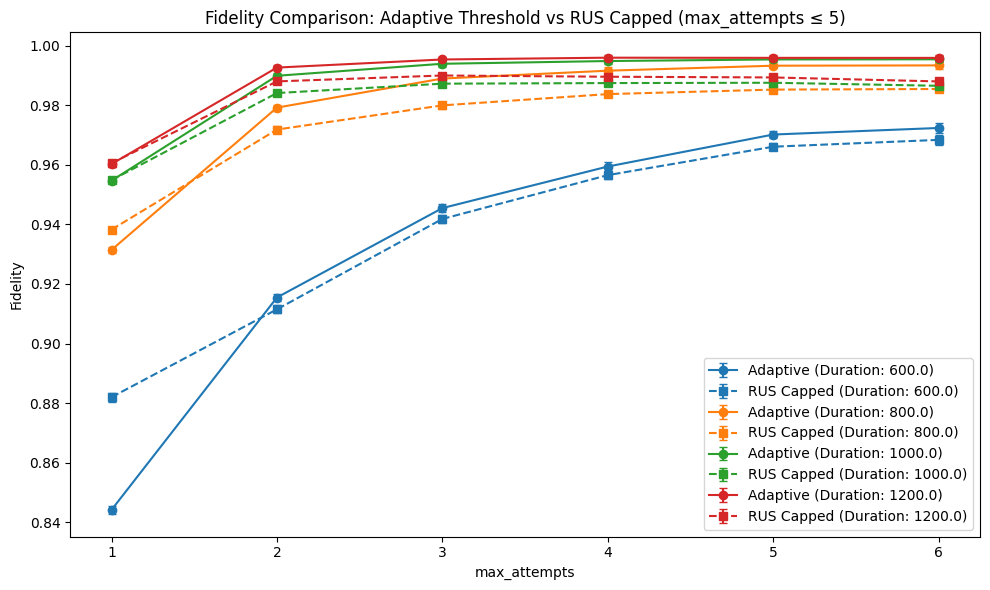

In [17]:
adaptive_threshold_results_ds_trunc = adaptive_threshold_results_ds.assign_coords(max_attempts=adaptive_threshold_results_ds.max_attempts - 1).where(lambda x: x.max_attempts >= 0, drop=True)
rus_capped_results_ds_trunc = rus_capped_results_ds.assign_coords(max_attempts=rus_capped_results_ds.max_attempts - 1).where(lambda x: x.max_attempts >= 0, drop=True)
plt.figure(figsize=(10, 6))

durations = adaptive_threshold_results_ds_trunc.duration.values
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

for idx, duration in enumerate(durations):
    color = colors[idx % len(colors)]

    # plt.errorbar(adaptive_threshold_results_ds_trunc.max_attempts.where(lambda x: x <= 5) + 1,
    #              adaptive_threshold_results_ds_trunc.fidelity.sel(iteration=0, duration=duration).where(lambda x: x.max_attempts <= 5),
    #              yerr=adaptive_threshold_results_ds_trunc.fidelity_error.sel(iteration=0, duration=duration).where(lambda x: x.max_attempts <= 5),
    #              marker='.', lw=0.3, color=color, label=f'Repeated active (Duration: {duration})', capsize=3)
    
    plt.errorbar(adaptive_threshold_results_ds_trunc.max_attempts.where(lambda x: x <= 7)+ 1,
                 adaptive_threshold_results_ds_trunc.fidelity.sel(iteration=3, duration=duration).where(lambda x: x.max_attempts <= 5),
                 yerr=adaptive_threshold_results_ds_trunc.fidelity_error.sel(iteration=3, duration=duration).where(lambda x: x.max_attempts <= 5),
                 marker='o', color=color, label=f'Adaptive (Duration: {duration})', capsize=3)
    
    plt.errorbar(rus_capped_results_ds_trunc.max_attempts.where(lambda x: x <= 7) + 1,
                 rus_capped_results_ds_trunc.fidelity.sel(duration=duration).where(lambda x: x.max_attempts <= 5),
                 yerr=rus_capped_results_ds_trunc.fidelity_error.sel(duration=duration).where(lambda x: x.max_attempts <= 5),
                 marker='s', color=color, linestyle='--', label=f'RUS Capped (Duration: {duration})', capsize=3)

plt.xlabel('max_attempts')
plt.ylabel('Fidelity')
plt.title('Fidelity Comparison: Adaptive Threshold vs RUS Capped (max_attempts ≤ 5)')
plt.legend()
# plt.xlim(0.9, 6.1)
plt.tight_layout()
plt.show()

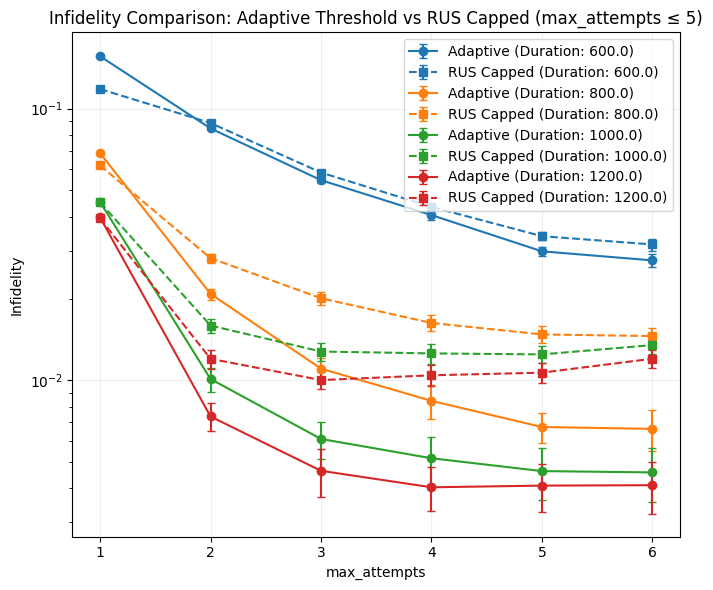

In [18]:
adaptive_threshold_results_ds_trunc = adaptive_threshold_results_ds.assign_coords(max_attempts=adaptive_threshold_results_ds.max_attempts - 1).where(lambda x: x.max_attempts >= 0, drop=True)
rus_capped_results_ds_trunc = rus_capped_results_ds.assign_coords(max_attempts=rus_capped_results_ds.max_attempts - 1).where(lambda x: x.max_attempts >= 0, drop=True)
plt.figure(figsize=(7, 6))

durations = adaptive_threshold_results_ds_trunc.duration.values
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

for idx, duration in enumerate(durations):
    color = colors[idx % len(colors)]

    # Calculate infidelity (1 - fidelity)
    adaptive_infidelity = 1 - adaptive_threshold_results_ds_trunc.fidelity.sel(iteration=3, duration=duration).where(lambda x: x.max_attempts <= 5)
    rus_infidelity = 1 - rus_capped_results_ds_trunc.fidelity.sel(duration=duration).where(lambda x: x.max_attempts <= 5)
    
    # Calculate error for infidelity
    adaptive_infidelity_error = adaptive_threshold_results_ds_trunc.fidelity_error.sel(iteration=3, duration=duration).where(lambda x: x.max_attempts <= 5)
    rus_infidelity_error = rus_capped_results_ds_trunc.fidelity_error.sel(duration=duration).where(lambda x: x.max_attempts <= 5)
    
    plt.errorbar(adaptive_threshold_results_ds_trunc.max_attempts.where(lambda x: x <= 7) + 1,
                 adaptive_infidelity,
                 yerr=adaptive_infidelity_error,
                 marker='o', color=color, label=f'Adaptive (Duration: {duration})', capsize=3)
    
    plt.errorbar(rus_capped_results_ds_trunc.max_attempts.where(lambda x: x <= 7) + 1,
                 rus_infidelity,
                 yerr=rus_infidelity_error,
                 marker='s', color=color, linestyle='--', label=f'RUS Capped (Duration: {duration})', capsize=3)

plt.xlabel('max_attempts')
plt.ylabel('Infidelity')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Infidelity Comparison: Adaptive Threshold vs RUS Capped (max_attempts ≤ 5)')
plt.legend()
plt.grid(alpha = 0.2)
plt.tight_layout()
plt.show()

# Poster plots

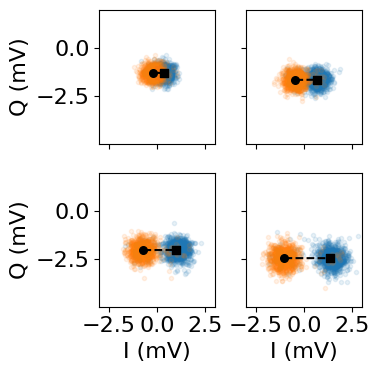

In [19]:
IQ_blobs_datasets = [dataset for dataset in datasets if 'IQ_blobs' in dataset]
import matplotlib.pyplot as plt
import numpy as np
qname = 'q2'

plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 2, figsize=(4, 4))
axs = axs.flatten()

for idx, dataset_name in enumerate(IQ_blobs_datasets):
    ds = datasets[dataset_name]
    
    Ig = ds.I_g.sel(qubit = qname).values.flatten() * 1000  # Convert to mV
    Qg = ds.Q_g.sel(qubit = qname).values.flatten() * 1000  # Convert to mV
    Ie = ds.I_e.sel(qubit = qname).values.flatten() * 1000  # Convert to mV
    Qe = ds.Q_e.sel(qubit = qname).values.flatten() * 1000  # Convert to mV
    
    # Calculate centers of mass
    g_center = (np.mean(Ig), np.mean(Qg))
    e_center = (np.mean(Ie), np.mean(Qe))
    
    # Plot scatters
    axs[idx].scatter(Ie[:1000], Qe[:1000], marker = '.', label='Excited state', alpha = 0.1)
    axs[idx].scatter(Ig[:1000], Qg[:1000], marker = '.', label='Ground state', alpha = 0.1)
    
    # Plot centers of mass
    axs[idx].scatter(*g_center, color='k', s=30, marker='o', label = 'g.s. center')
    axs[idx].scatter(*e_center, color='k', s=30, marker='s', label = 'g.s. center')
    
    # Plot line between centers
    axs[idx].plot([g_center[0], e_center[0]], [g_center[1], e_center[1]], 'k--')
    
    axs[idx].axis("equal")
    axs[idx].set_ylim([-5,2])
    axs[idx].set_xlim([-3.5,3.5])

    # Remove tick labels for internal subplots
    if idx in [0, 1]:
        axs[idx].set_xticklabels([])
    if idx in [1, 3]:
        axs[idx].set_yticklabels([])
    
    # Only set labels for external facets
    if idx in [2, 3]:
        axs[idx].set_xlabel('I (mV)')
    if idx in [0, 2]:
        axs[idx].set_ylabel('Q (mV)')

    # if idx in [0]:
    #     axs[idx].legend()
    
plt.tight_layout()
# Export the plot in SVG format
plt.savefig('AQC_fig1_iq_blobs_plot.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show() # Close the current figure to free up memory




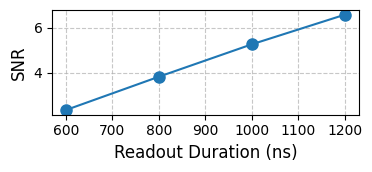

In [20]:
plt.rcParams.update({'font.size': 16})

# Calculate the ratio of separation to average width
ratio = IQ_blobs_results_ds.separation / IQ_blobs_results_ds.avg_width



# Create a nicer plot
plt.figure(figsize=(4, 2))
plt.plot(ratio.duration, ratio.values, marker='o', linestyle='-', color='#1f77b4', markersize=8)
plt.xlabel('Readout Duration (ns)', fontsize=12)
plt.ylabel('SNR', fontsize=12)
# plt.title('IQ Blob Separation to Width Ratio vs Readout Duration', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.savefig('AQC_fig2_SNR_readout.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()  # Close the current figure to free up memory



Intersection point: 0.1253 mV
Infidelity: 0.4906 ± 0.0042
Fidelity: 0.5094 ± 0.0042


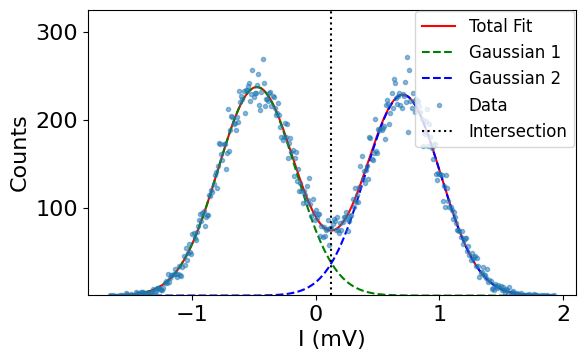

In [21]:
ds = datasets[IQ_blobs_datasets[1]]
angle, threshold, fidelity, gg, ge, eg, ee = two_state_discriminator(ds.I_g.sel(qubit = qname), ds.Q_g.sel(qubit = qname), ds.I_e.sel(qubit = qname), ds.Q_e.sel(qubit = qname), False, b_plot=False)
Ig_rot = ds.I_g.sel(qubit = qname) * np.cos(angle) - ds.Q_g.sel(qubit = qname) * np.sin(angle)  
Ie_rot = ds.I_e.sel(qubit = qname) * np.cos(angle) - ds.Q_e.sel(qubit = qname) * np.sin(angle)
I_rot = np.concatenate((Ig_rot, Ie_rot))

ds_I = xr.Dataset({'I' : (['qubit','N'], [I_rot])})
popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error(ds_I.I)
f = plot_threshold_analysis(ds_I, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset, logplot = False, figsize = (6.3,3.7), lables=True)
f.axes[0].set_title('')
# Remove the legend
f.axes[0].get_legend().remove()

f.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.91, 0.9))

plt.savefig('AQC_fig3_no_reset_gauss.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()  # Close the current figure to free up memory


Analyzing dataset: 1200ns_IQ_blobs
  Analyzing iteration = 3
    Analyzing for max_attempts = 5
Intersection point: 0.4661 mV
Infidelity: 0.0067 ± 0.0008
Fidelity: 0.9933 ± 0.0008


c:\Users\tomdv\Documents\QCC_QUAM\CS_installations\experiments\Adaptive_thershold\adaptive_threshold_function.py:350: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\tomdv\AppData\Local\Temp\ipykernel_54980\3026716083.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f.axes[0].legend().remove()


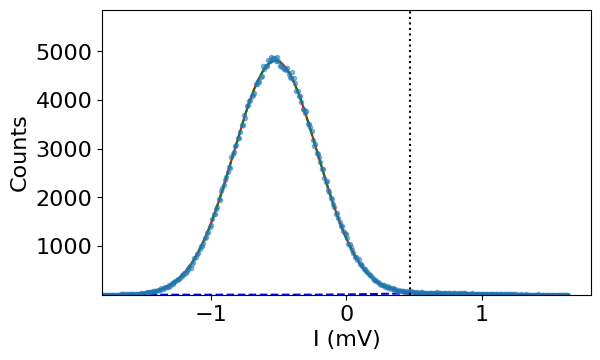


Analyzing dataset: 1200ns_IQ_blobs
  Analyzing iteration = 3
    Analyzing for max_attempts = 5
Intersection point: 0.4661 mV
Infidelity: 0.0067 ± 0.0008
Fidelity: 0.9933 ± 0.0008


C:\Users\tomdv\AppData\Local\Temp\ipykernel_54980\3026716083.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f.axes[0].legend().remove()


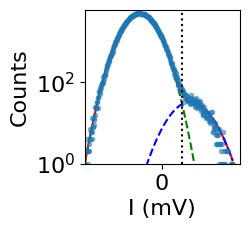

In [22]:
ds = datasets[f'800ns_Adaptive threshold']
print(f"\nAnalyzing dataset: {dataset_name}")

iteration = 3
print(f"  Analyzing iteration = {iteration}")
popt0 = find_threshold_with_error( ds.sel(iteration=iteration, max_attempts=0).I)[0]
max_attempts = 5

print(f"    Analyzing for max_attempts = {max_attempts}")
ds_iter_max_attempts = ds.sel(iteration=iteration, max_attempts=max_attempts)
popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_fixed(ds_iter_max_attempts.I, popt0)

# Call the function with the results from the analysis
f= plot_threshold_analysis(ds_iter_max_attempts, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset, logplot=False, figsize = (6.3,3.7),lables=False)
f.axes[0].legend().remove()
# if max_attempts>0:
#     f.axes[0].axvline(adaptive_threshold_results_ds.threshold.sel(iteration = 3, max_attempts = 0, duration =800),color='r', linestyle=':', label='Original threshold')
# f.axes[0].axvline(adaptive_threshold_results_ds.threshold.sel(iteration = 3, max_attempts = max_attempts, duration =800),color='k', linestyle=':', label='New threshold')
# f.axes[0].legend(['Original threshold','New threshold'])
# # Multiply x-axis values by 1000
f.axes[0].set_title('')
current_xticks = f.axes[0].get_xticks()
f.axes[0].set_xticks(current_xticks)
f.axes[0].set_xlabel('I (mV)')  # Update x-axis label to reflect new units
f.axes[0].set_xlim([-1.8,1.8])
plt.savefig('AQC_fig4a_reset_gauss.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()  # Close the current figure to free up memory

ds = datasets[f'800ns_Adaptive threshold']
print(f"\nAnalyzing dataset: {dataset_name}")

iteration = 3
print(f"  Analyzing iteration = {iteration}")
popt0 = find_threshold_with_error( ds.sel(iteration=iteration, max_attempts=0).I)[0]
max_attempts = 5

print(f"    Analyzing for max_attempts = {max_attempts}")
ds_iter_max_attempts = ds.sel(iteration=iteration, max_attempts=max_attempts)
popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_fixed(ds_iter_max_attempts.I, popt0)

# Call the function with the results from the analysis
f= plot_threshold_analysis(ds_iter_max_attempts, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset, logplot=True, figsize = (2,2), lables = False)
f.axes[0].legend().remove()
# if max_attempts>0:
#     f.axes[0].axvline(adaptive_threshold_results_ds.threshold.sel(iteration = 3, max_attempts = 0, duration =800),color='r', linestyle=':', label='Original threshold')
# f.axes[0].axvline(adaptive_threshold_results_ds.threshold.sel(iteration = 3, max_attempts = max_attempts, duration =800),color='k', linestyle=':', label='New threshold')
# f.axes[0].legend(['Original threshold','New threshold'])
# # Multiply x-axis values by 1000
f.axes[0].set_title('')

current_xticks = f.axes[0].get_xticks()
f.axes[0].set_xticks(current_xticks)
f.axes[0].set_xlabel('I (mV)')  # Update x-axis label to reflect new units
f.axes[0].set_xlim([-1.8,1.8])

plt.savefig('AQC_fig4b_reset_gauss.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\tomdv\AppData\Local\Temp\ipykernel_54980\2841880532.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f.axes[0].legend().remove()



Analyzing dataset: 1200ns_IQ_blobs
  Analyzing iteration = 3
    Analyzing for max_attempts = 0
Intersection point: 0.0976 mV
Infidelity: 0.4209 ± 0.0012
Fidelity: 0.5791 ± 0.0012


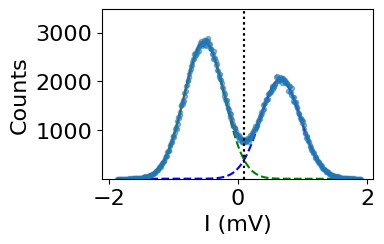

      Dataset duration: 1200.0
      Dataset iteration: 3
      Dataset max_attempts value: 0
      Dataset date: Not specified
      ------------------------------------------
    Analyzing for max_attempts = 1
Intersection point: 0.2801 mV
Infidelity: 0.0686 ± 0.0010
Fidelity: 0.9314 ± 0.0010


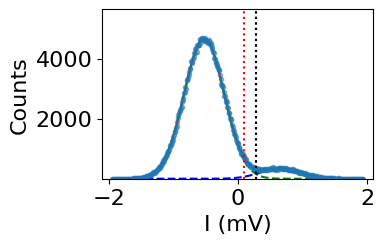

      Dataset duration: 1200.0
      Dataset iteration: 3
      Dataset max_attempts value: 1
      Dataset date: Not specified
      ------------------------------------------
    Analyzing for max_attempts = 2
Intersection point: 0.3773 mV
Infidelity: 0.0208 ± 0.0010
Fidelity: 0.9792 ± 0.0010


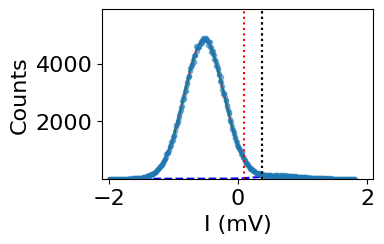

      Dataset duration: 1200.0
      Dataset iteration: 3
      Dataset max_attempts value: 2
      Dataset date: Not specified
      ------------------------------------------
    Analyzing for max_attempts = 3
Intersection point: 0.4349 mV
Infidelity: 0.0110 ± 0.0011
Fidelity: 0.9890 ± 0.0011


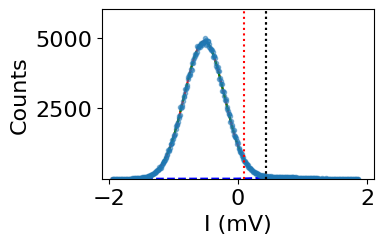

      Dataset duration: 1200.0
      Dataset iteration: 3
      Dataset max_attempts value: 3
      Dataset date: Not specified
      ------------------------------------------


In [23]:
ds = datasets[f'800ns_Adaptive threshold']
print(f"\nAnalyzing dataset: {dataset_name}")

iteration = 3
print(f"  Analyzing iteration = {iteration}")
popt0 = find_threshold_with_error( ds.sel(iteration=iteration, max_attempts=0).I)[0]
for max_attempts in [0,1,2,3]:
    print(f"    Analyzing for max_attempts = {max_attempts}")
    ds_iter_max_attempts = ds.sel(iteration=iteration, max_attempts=max_attempts)
    popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset = find_threshold_with_error_and_guess_fixed(ds_iter_max_attempts.I, popt0)

    # Call the function with the results from the analysis
    f= plot_threshold_analysis(ds_iter_max_attempts, popt_final, perr_final, intersection, infidelity, infidelity_error, fit_dataset, logplot=False, figsize = (3.5,2.2), lables = False)
    f.axes[0].legend().remove()
    if max_attempts>0:
        f.axes[0].axvline(1e3*adaptive_threshold_results_ds.threshold.sel(iteration = 3, max_attempts = 0, duration =800),color='r', linestyle=':', label='Original threshold')
    f.axes[0].axvline(1e3*adaptive_threshold_results_ds.threshold.sel(iteration = 3, max_attempts = max_attempts, duration =800),color='k', linestyle=':', label='New threshold')
    # f.axes[0].legend(['Original threshold','New threshold'])
    # Multiply x-axis values by 1000
    current_xticks = f.axes[0].get_xticks()
    f.axes[0].set_xticks(current_xticks)
    f.axes[0].set_title('')
    # f.axes[0].set_xticklabels([f'{x*1000:.1f}' for x in current_xticks])
    f.axes[0].set_xlabel('I (mV)')  # Update x-axis label to reflect new units
    f.axes[0].set_xlim([-2.1,2.1])
    plt.savefig(f'AQC_fig5_{max_attempts}_adaptive_gauss.svg', format='svg', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print additional information about the dataset
    print(f"      Dataset duration: {duration}")
    print(f"      Dataset iteration: {iteration}")
    print(f"      Dataset max_attempts value: {max_attempts}")
    print(f"      Dataset date: {ds.attrs.get('date', 'Not specified')}")
    print("      " + "-" * 42)



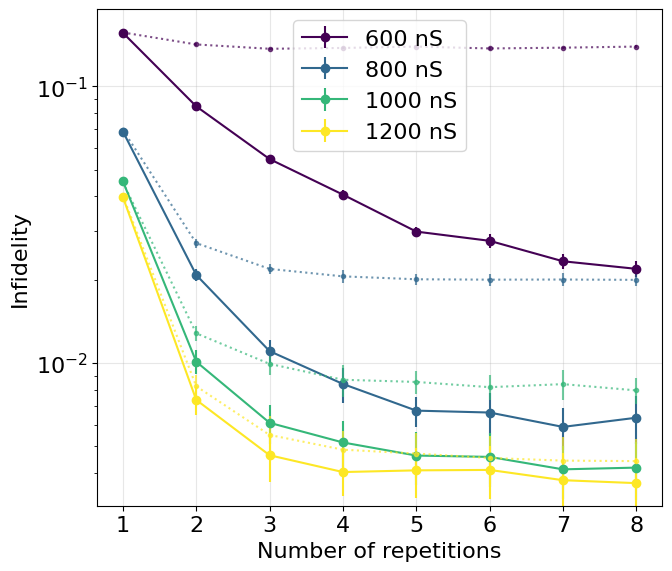

In [24]:
# Plot results from adaptive threshold experiment, ignoring max_attempts=1

f,ax = plt.subplots(figsize = (7,6))
durations = adaptive_threshold_results_ds.duration.values
colors = plt.cm.viridis(np.linspace(0, 1, len(durations)))

for idx, duration in enumerate(durations):
    for iteration in [0,3]:  # Assuming 4 iterations (0-3)
        data = adaptive_threshold_results_ds.sel(duration=duration, iteration=iteration)
        
        # Filter out max_attempts=1
        data = data.where(data.max_attempts > 0, drop=True)
        
        # Calculate infidelity and its error
        infidelity = 1 - data.fidelity
        infidelity_error = data.fidelity_error
        
        ax.errorbar(data.max_attempts, infidelity, 
                     yerr=infidelity_error,  # Using 2-sigma error bars
                     marker='o' if iteration == 3 else '.', 
                     linestyle='-' if iteration == 3 else ':',
                     color=colors[idx],
                     label=f'{duration:.0f} nS' if iteration == 3 else None,
                     alpha=0.7 if iteration < 3 else 1)
        ax.set_yscale('log')

plt.xlabel('Number of repetitions')
plt.ylabel('Infidelity')
# plt.title('Adaptive Threshold Experiment Results (max_attempts > 1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('AQC_fig6_adaptive_summary.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

600ns
800ns
1000ns
1200ns


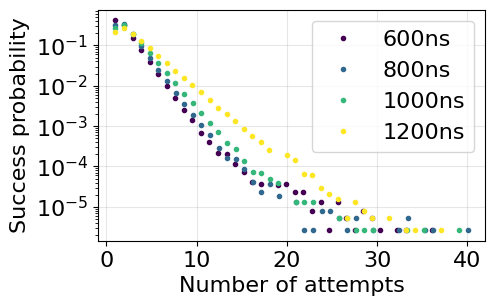

In [28]:

f,ax =plt.subplots(figsize=(5,3))
idx = 0
for dataset_name, ds in datasets.items():
    if 'RUS initialization' not in dataset_name:
        continue
    print(dataset_name[:-19])
    # Calculate the histogram
    hist, bins = np.histogram(ds.attempts, bins=int(ds.attempts.max().values) + 1, density=True)
    ax.semilogy(bins[:-1], hist,'.',label = dataset_name[:-19], color = colors[idx])
    ax.set_xlabel('Number of attempts')
    ax.set_ylabel('Success probability')
    # ax.set_title('Normalized Histogram of Attempts')
    ax.grid(alpha=0.3)
    idx += 1
ax.legend()

plt.savefig('AQC_fig7_RUS_attemtps.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()    

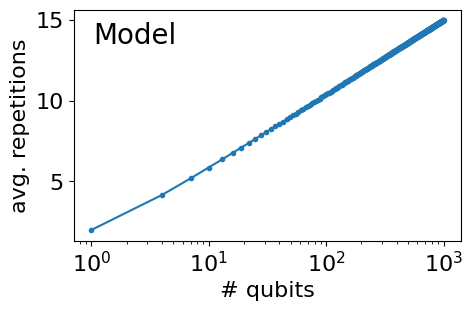

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the probability distribution for the largest draw
def P_largest(t, N, Q):
    term1 = N * (1 - np.exp(-t / Q))**(N - 1)
    term2 = (1 / Q) * np.exp(-t / Q)
    return term1 * term2

# Function to calculate the expected value (average) of t
def expected_t(N, Q):
    def integrand(t, N, Q):
        return t * P_largest(t, N, Q)
    result, _ = quad(integrand, 0, np.inf, args=(N, Q))
    return result

# Function to calculate the variance of t
def variance_t(N, Q):
    def integrand_mean(t, N, Q):
        return t * P_largest(t, N, Q)
    
    def integrand_mean_squared(t, N, Q):
        return (t**2) * P_largest(t, N, Q)
    
    mean, _ = quad(integrand_mean, 0, np.inf, args=(N, Q))
    mean_squared, _ = quad(integrand_mean_squared, 0, np.inf, args=(N, Q))
    
    variance = mean_squared - mean**2
    return variance

# Set the value of Q
Q = 2.0  # You can change Q if needed

# Generate values of N
N_values = np.arange(1, 1001,3)

# Compute the average t and variance for each N
average_t_values = [expected_t(N, Q) for N in N_values]
variance_t_values = [variance_t(N, Q) for N in N_values]

# Plot the average t as a function of N
# plt.figure(figsize=(8, 6))
f,ax = plt.subplots(1, figsize = (5,3))
ax.semilogx(N_values, average_t_values, marker='.', label='Average t')
# plt.title('Average t as a Function of N')
ax.set_xlabel('# qubits')
ax.set_ylabel('avg. repetitions')
ax.text(0.05, 0.95, 'Model', transform=ax.transAxes, verticalalignment='top', fontsize=20)

# plt.grid(True)


plt.savefig('AQC_fig8_RUS_model.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show() # Close the current figure to free up memory


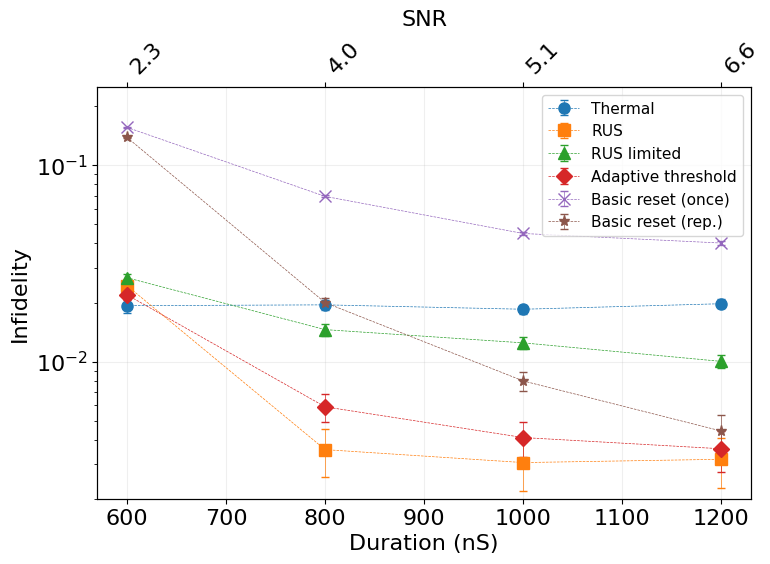

In [27]:

# Plot infidelity summary
f, ax = plt.subplots(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'x','*']  # Different markers for each method

labels = ['Thermal', 'RUS', 'RUS limited', 'Adaptive threshold', 'Basic reset (once)', 'Basic reset (rep.)']
for i, method in enumerate(methods):
    infidelity = 1 - summary.best_fidelity.sel(experiment=method)
    infidelity_error = summary.best_error.sel(experiment=method)
    ax.errorbar(durations, infidelity, 
                yerr=infidelity_error,
                marker=markers[i], label=labels[i], ms = 8, capsize=3, linestyle='--', lw=0.5)

ax.set_xlabel('Duration (nS)')
ax.set_ylabel('Infidelity')
# ax.set_title('Infidelity Summary for Different Methods')
ax.legend(fontsize='x-small')  # Reduced legend font size
ax.grid(True, alpha=0.2)

# times = np.linspace(600,4000)
# limit =  times /20000 * 0.04
# ax.plot(times,limit,'--',color = 'k')
ax.set_ylim([2e-3,2.5e-1])
ax.set_yscale('log')  # Set y-axis to logarithmic scale
# Create a secondary x-axis for the separation/width ratio
ax2 = ax.twiny()

# Calculate the ratio values for each method and duration
ratio_values = summary.separation_width_ratio.values

# Set the secondary x-axis ticks and labels
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(durations)
ax2.set_xticklabels([f'{ratio:.1f}' for ratio in ratio_values[0]], rotation=45, ha='left')

# Set the label for the secondary x-axis
ax2.set_xlabel('SNR')

# Adjust the position of the secondary x-axis label to avoid overlap
ax2.xaxis.set_label_coords(0.5, 1.15)

# Adjust x-axis ticks if needed
if len(durations) > 10:
    ax.set_xticks(rotation=45, fontsize='x-small')  # Reduced tick font size

plt.tight_layout()

plt.savefig('AQC_fig9_reset_methods.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()


# %%